In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

## Step 1:
### Init Network Topology and Electrostatic Properties:
- Network Topology either `"cubic"` or `"random"`
- `topology_parameter` defines network parameter via the following keys
- if `"cubic"`
    - `"Nx"`    :   Number of Nanoparticles in x-direction
    - `"Ny"`    :   Number of Nanoparticles in y-direction
    - `"Nz"`    :   Number of Nanoparticles in z-direction
    - `"e_pos"` :   Electrode positions as list of lists. Each element corresponds to nanoparticle position `[x,y,z]` which is attached to an electrode

- if `"random"`
    - `$N_{NP}$`    :   Number of Nanoparticles
    - `$N_{J}$`     :   Number of Junctions per Nanoparticle
    - `"e_pos"`     :   Electrode positions as list of lists. Each element corresponds to cartesian coordinates `[x,y]` of the specific electrode. Closest nanoparticle to this electrode will be attached to it

- `np_info` defines electrostatic properies via nanoparticle properties
    - `"eps_r"`         : relative permittivity of the insulating molecule
    - `"eps_s"`         : relative permittivity of the insulating SiO2 layer
    - `"mean_radius"`   : average nanoparticle radius [nm]
    - `"std_radius"`    : standard deviation nanopartcile radius [nm]  
    - `"np_distance"`   : spacing in between nanoparticles

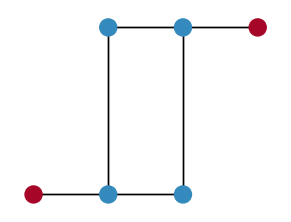

In [3]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 2,
    "Ny"    : 2,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[1,1,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=150)

In [4]:
def logisticFunc(self,x,start,end,turnpoint=0.0,smoothness=1.0):
    """
    An inverse Sigmoid-Function
    x: variable; start: value for -infinit, end: value for +infinit, 
    turnpoint: Value of the turning point, smoothness: steepness around the turning point
    """
    yFactor = 1+np.exp((-1)*smoothness*turnpoint) #ensures that the function always has the value = start for x = 0
    return yFactor*(start-end)/(1+np.exp(smoothness*(x-turnpoint))) + end

In [ ]:
def bimodal_resistor(I_tilde, slope : float, shift : float, R_max : float, R_min : float):

    return (R_max - R_min)*(-np.tanh(slope*(I_tilde - shift)) + 1)/2 + R_min

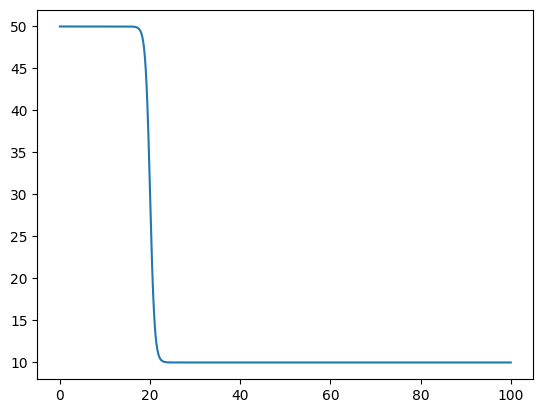

In [26]:
R_max   = 50
R_min   = 10
slope   = 1
offset  = 20

x   = np.linspace(0,100,10000)
y   = (R_max - R_min)*(-np.tanh(slope*(x - offset)) + 1)/2 + R_min

plt.plot(x,y)